>


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  Smartphone Price Prediction </h1>
</div>


# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" > TABLE OF CONTENTS<br><div>  
* [LIBRARY IMPORTS](#1)
* [LOAD DATA](#2)
* [Statastical Summary](#3)
* [Encoding](#4) 
* [EDA](#5)
* [Feature Scaling](#6) 
* [Splitting data](#7) 
* [Training and evalution of model](#8) 
* [Splitting data](#7)
* [Model comparison](#8) 
* [Conclusion](#9) 
   

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LIBRARY IMPORTS
</div>


In [265]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LOAD DATA
</div>

In [266]:
df = pd.read_csv('mobile_detail.csv')
df.head()

,ratings,price,imgURL,corpus,brand,mobile_name,color,storage,system,processor_type,resolution,size
0,4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,storage128 gbram6 systemandroid 12processor t...,redmi,Note 12 Pro 5G,black,128,android,mediatek,Full HD,6.7
1,4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,storage128 gbram6 gbexpandable storage256gb s...,oppo,F11 Pro,green,128,android,mediatek,Full HD,6.5
2,4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,storage64 gbram4 systemandroid 11processor sp...,redmi,Note 11,white,64,android,NaN,Full HD,6.4
3,4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,storage256 gbram12 systemandroid q 11processo...,oneplus,Nord CE 5G,blue,256,android,qualcomm,Full HD,6.4
4,4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,storage128 systemios 15processor typea15 bion...,apple,iPhone 13 mini,blue,128,ios,apple,Full HD,5.4


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ratings         1984 non-null   float64
 1   price           1984 non-null   int64  
 2   imgURL          1984 non-null   object 
 3   corpus          1984 non-null   object 
 4   brand           1984 non-null   object 
 5   mobile_name     1984 non-null   object 
 6   color           1984 non-null   object 
 7   storage         1984 non-null   int64  
 8   system          1984 non-null   object 
 9   processor_type  1644 non-null   object 
 10  resolution      1984 non-null   object 
 11  size            1983 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 186.1+ KB


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Handling missing data
</div>

In [268]:
df.isnull().sum()

ratings             0
price               0
imgURL              0
corpus              0
brand               0
mobile_name         0
color               0
storage             0
system              0
processor_type    340
resolution          0
size                1
dtype: int64

# Fill missing processor_type with 'unknown'

In [269]:
df['processor_type'].fillna('unknown', inplace=True)

# Drop the missing data of size

In [270]:
df.dropna(inplace=True)

In [271]:
df.isnull().sum()

ratings           0
price             0
imgURL            0
corpus            0
brand             0
mobile_name       0
color             0
storage           0
system            0
processor_type    0
resolution        0
size              0
dtype: int64

In [272]:
df.shape

(1983, 12)

In [273]:
mobdf=df
mobdf

,ratings,price,imgURL,corpus,brand,mobile_name,color,storage,system,processor_type,resolution,size
0,4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,storage128 gbram6 systemandroid 12processor t...,redmi,Note 12 Pro 5G,black,128,android,mediatek,Full HD,6.7
1,4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,storage128 gbram6 gbexpandable storage256gb s...,oppo,F11 Pro,green,128,android,mediatek,Full HD,6.5
2,4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,storage64 gbram4 systemandroid 11processor sp...,redmi,Note 11,white,64,android,unknown,Full HD,6.4
3,4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,storage256 gbram12 systemandroid q 11processo...,oneplus,Nord CE 5G,blue,256,android,qualcomm,Full HD,6.4
4,4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,storage128 systemios 15processor typea15 bion...,apple,iPhone 13 mini,blue,128,ios,apple,Full HD,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1979,4.2,29999,https://rukminim2.flixcart.com/image/312/312/k...,storage256 gbram12 systemandroid pie 9 pie ox...,oneplus,7 Pro,blue,256,android,unknown,2K,6.7
1980,4.1,15999,https://rukminim2.flixcart.com/image/312/312/x...,storage128 gbram6 gbexpandable storage1tb sys...,motorola,g72,grey,128,android,mediatek,Full HD,6.5
1981,4.3,11999,https://rukminim2.flixcart.com/image/312/312/k...,storage64 gbram4 gbexpandable storage512gb sy...,redmi,Note 9,black,64,android,mediatek,Full HD,6.5
1982,3.9,30203,https://rukminim2.flixcart.com/image/312/312/x...,storage128 gbram8 systemandroid 11processor s...,oneplus,9 5G,black,128,android,unknown,Full HD,6.5


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Statastical Summary
</div>

In [274]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
ratings,1983.000000,4.303833,0.207468,2.900000,4.200000,4.300000,4.400000,5.000000
price,1983.000000,17028.480585,8620.669785,73.000000,10499.000000,15337.000000,23463.000000,89999.000000
storage,1983.000000,123.997983,91.562378,16.000000,64.000000,128.000000,128.000000,512.000000
size,1983.000000,6.350378,0.505907,1.800000,6.300000,6.500000,6.600000,7.600000


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Encoding
</div>

In [275]:
drop_col=['imgURL','corpus','mobile_name']
df.drop(drop_col,inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,brand,color,system,processor_type,resolution
0,redmi,black,android,mediatek,Full HD
1,oppo,green,android,mediatek,Full HD
2,redmi,white,android,unknown,Full HD
3,oneplus,blue,android,qualcomm,Full HD
4,apple,blue,ios,apple,Full HD
...,...,...,...,...,...
1979,oneplus,blue,android,unknown,2K
1980,motorola,grey,android,mediatek,Full HD
1981,redmi,black,android,mediatek,Full HD
1982,oneplus,black,android,unknown,Full HD


In [276]:
df[object_columns]

,brand,color,system,processor_type,resolution
0,redmi,black,android,mediatek,Full HD
1,oppo,green,android,mediatek,Full HD
2,redmi,white,android,unknown,Full HD
3,oneplus,blue,android,qualcomm,Full HD
4,apple,blue,ios,apple,Full HD
...,...,...,...,...,...
1979,oneplus,blue,android,unknown,2K
1980,motorola,grey,android,mediatek,Full HD
1981,redmi,black,android,mediatek,Full HD
1982,oneplus,black,android,unknown,Full HD


In [277]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'brand':
['redmi' 'oppo' 'oneplus' 'apple' 'infinix' 'samsung' 'vivo' 'motorola'
 'realme' 'mi' 'tecno' 'xiaomi']

Unique values in 'color':
['black' 'green' 'white' 'blue' 'gold' 'purple' 'red' 'grey' 'silver']

Unique values in 'system':
['android' 'ios']

Unique values in 'processor_type':
['mediatek' 'unknown' 'qualcomm' 'apple' 'unisoc' 'samsung']

Unique values in 'resolution':
['Full HD' '4K' 'HD' '2K']



In [278]:
rdf=df[['price', 'brand', 'color', 'storage', 'system','processor_type', 'resolution', 'size']]
rdf.columns

Index(['price', 'brand', 'color', 'storage', 'system', 'processor_type',
       'resolution', 'size'],
      dtype='object')

In [279]:
# mobd=pd.read_csv('mobile_detail.csv')

In [280]:
# rdf['Model_name']=mobd['mobile_name']
# rdf

In [281]:
for column in rdf.columns:
    unique_values = rdf[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'price':
[23999 20999 13149 21999  3537  5537  9999 12999 15990  6999 10990 24463
  7537 17537 13990 14463 22990 19087  9499 31637 32537  6499  9490 16999
  7799 14999 25937 28537 15999 14990    73 22000 13999 17499 19999 13499
 30537 16200 15790 10999 22537 19990 12990 10499  8999 23990 18490 15537
 26927 10537  6099 10073 11086 16990 11499  7299  8998 15390 14499  8537
 29960 25000 17999 41990  9299 32546 23537  8149 11999 21800 23837  6299
 18990  4464  8490 15799 14890 27172 23636 12749 31602 21172 27990 19864
 25856 15337 23463 24990 31999 18499  9261 14885  6927 24999  7999 13980
 14476  1463  3073  6463 20990  8499 14775 13828  1172 16479 16980 17691
  9049 12280  8597 12499 29999 25990 24364 19364 26364  7773 32990 32999
 28990 39999 24546 11990 21990  8864 29073  9537 18999 39990  6464 24900
  9990 17990  8828  8699 29990  7990 17890 27819 28799 21252 54999 25546
 18884 28546 14537 18537 28858 17480 15798 15499 21490 25989 28999  7199
 15490 29547 16537  9000 

# One-Hot encoding

In [282]:

# df1 = pd.get_dummies(rdf, columns=rdf.columns)

In [283]:
df

,ratings,price,brand,color,storage,system,processor_type,resolution,size
0,4.2,23999,redmi,black,128,android,mediatek,Full HD,6.7
1,4.5,20999,oppo,green,128,android,mediatek,Full HD,6.5
2,4.2,13149,redmi,white,64,android,unknown,Full HD,6.4
3,4.1,21999,oneplus,blue,256,android,qualcomm,Full HD,6.4
4,4.6,3537,apple,blue,128,ios,apple,Full HD,5.4
...,...,...,...,...,...,...,...,...,...
1979,4.2,29999,oneplus,blue,256,android,unknown,2K,6.7
1980,4.1,15999,motorola,grey,128,android,mediatek,Full HD,6.5
1981,4.3,11999,redmi,black,64,android,mediatek,Full HD,6.5
1982,3.9,30203,oneplus,black,128,android,unknown,Full HD,6.5


In [284]:
df.shape

(1983, 9)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    EDA
</div>

In [287]:
# sns.boxplot(df1)

In [289]:
# import matplotlib.pyplot as plt
# import numpy as np
# non_boolean_numerical_features = [ 'price', 'storage', 'size']
# boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()

# boolean_features_except_numerical = [col for col in boolean_columns if col not in non_boolean_numerical_features]
# # Visualize the distributions and box plots for numerical features, including log-transformed versions for skewed data
# for column in non_boolean_numerical_features:
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

#     # Histogram for the distribution
#     sns.histplot(df1[column], kde=False, color='skyblue', ax=ax1)
#     ax1.set_title(f'Distribution of {column}')
#     ax1.set_ylabel('Frequency')

#     # Boxplot for the variable
#     sns.boxplot(x=df1[column], color='lightgreen', ax=ax2)
#     ax2.set_title(f'Boxplot of {column}')

#     # Log transformation and plot if the data is skewed
#     if df1[column].skew() > 1:
#         df1[column+'_log'] = np.log1p(df1[column])
#         sns.histplot(df1[column+'_log'], kde=False, color='orange', ax=ax3)
#         ax3.set_title(f'Log-transformed Distribution of {column}')
#     else:
#         ax3.set_title(f'Log-transformed plot not necessary for {column}')
#         ax3.axis('off')

#     plt.tight_layout()
#     plt.show()


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 15px;"> we can not consider these outlier for above feature. </h1>
</div>

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Feature Scaling
</div>

In [290]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = [ 'price', 'storage', 'size']
scaler = MinMaxScaler()
# df1[non_boolean_numerical_features] = scaler.fit_transform(df1[non_boolean_numerical_features])


In [291]:
# df1

For regression tasks where the target variable is continuous, it's generally not necessary to scale the target variable. Algorithms like Linear Regression, Decision Trees, Random Forest, and Gradient Boosting Machines can handle continuous target variables without requiring scaling.

if you're using algorithms that are sensitive to the scale of the target variable, such as Support Vector Machines (SVM) with a regression (SVR) or NuSVR kernel, you might consider scaling the target variable

In [292]:
# y_unscaled=df['price']
# y_unscaled

In [303]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = [ 'price']
scaler = MinMaxScaler()
df[non_boolean_numerical_features] = scaler.fit_transform(df[non_boolean_numerical_features])

In [304]:
y_scaled = df['price']
y_scaled

0       0.266063
1       0.232702
2       0.145408
3       0.243823
4       0.038521
          ...   
1979    0.332785
1980    0.177101
1981    0.132620
1982    0.335053
1983    0.154861
Name: price, Length: 1983, dtype: float64

In [305]:
df

,ratings,price,brand,color,storage,system,processor_type,resolution,size
0,4.2,0.266063,redmi,black,128,android,mediatek,Full HD,6.7
1,4.5,0.232702,oppo,green,128,android,mediatek,Full HD,6.5
2,4.2,0.145408,redmi,white,64,android,unknown,Full HD,6.4
3,4.1,0.243823,oneplus,blue,256,android,qualcomm,Full HD,6.4
4,4.6,0.038521,apple,blue,128,ios,apple,Full HD,5.4
...,...,...,...,...,...,...,...,...,...
1979,4.2,0.332785,oneplus,blue,256,android,unknown,2K,6.7
1980,4.1,0.177101,motorola,grey,128,android,mediatek,Full HD,6.5
1981,4.3,0.132620,redmi,black,64,android,mediatek,Full HD,6.5
1982,3.9,0.335053,oneplus,black,128,android,unknown,Full HD,6.5


In [306]:
x = df.drop(['price'],axis=1)
x

,ratings,brand,color,storage,system,processor_type,resolution,size
0,4.2,redmi,black,128,android,mediatek,Full HD,6.7
1,4.5,oppo,green,128,android,mediatek,Full HD,6.5
2,4.2,redmi,white,64,android,unknown,Full HD,6.4
3,4.1,oneplus,blue,256,android,qualcomm,Full HD,6.4
4,4.6,apple,blue,128,ios,apple,Full HD,5.4
...,...,...,...,...,...,...,...,...
1979,4.2,oneplus,blue,256,android,unknown,2K,6.7
1980,4.1,motorola,grey,128,android,mediatek,Full HD,6.5
1981,4.3,redmi,black,64,android,mediatek,Full HD,6.5
1982,3.9,oneplus,black,128,android,unknown,Full HD,6.5


In [307]:
x= pd.get_dummies(x, columns=x.columns)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Splitting data
</div>

In [308]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

In [309]:
X_train

,ratings_2.9,ratings_3.1,ratings_3.3,ratings_3.5,ratings_3.6,ratings_3.7,ratings_3.8,ratings_3.9,ratings_4.0,ratings_4.1,...,size_6.2,size_6.3,size_6.4,size_6.5,size_6.6,size_6.7,size_6.8,size_6.9,size_7.0,size_7.6
720,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
480,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
71,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1693,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1295,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [310]:
y_train

720     0.055601
480     0.199242
567     0.101806
71      0.099248
1693    0.272046
          ...   
1131    0.088695
1295    0.154861
861     0.286113
1460    0.104719
1127    0.199342
Name: price, Length: 1586, dtype: float64

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Training and evalution of model
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> LinearRegression </h1>
</div>


In [311]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)



LinearRegression()

In [312]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)



In [314]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.005404103140926549
Testing MSE: 6.31273995448905e+20
Training R2 Score: 0.4295826836714992
Testing R2 Score: -7.863483592444474e+22


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

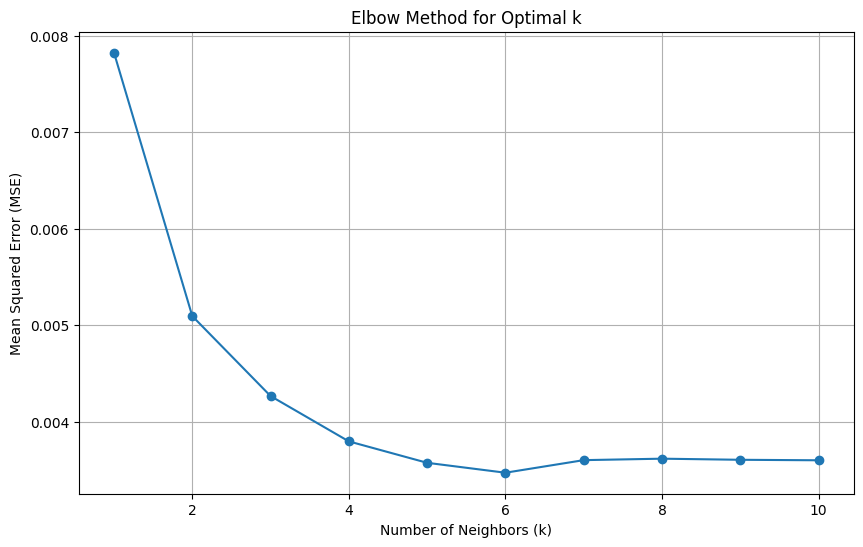

In [315]:
mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



In [316]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")



Optimal number of neighbors (k): 6


In [317]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=6)

In [318]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)



In [319]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0027358822369283682
Testing MSE: 0.00347403446157965
Training R2 Score: 0.7112204259092051
Testing R2 Score: 0.5672558479334769


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> DecisionTreeRegressor </h1>
</div>

In [320]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [321]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)




Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 10}


DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=10)

In [322]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)



In [323]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.002572758730065681
Testing MSE: 0.004125600029025149
Training R2 Score: 0.7284385415869075
Testing R2 Score: 0.4860933862140452


In [324]:
import pickle

filename = 'mobile_price_prediction_model2.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_dt_regressor, file)


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> RandomForestRegressor </h1>
</div>

In [325]:

from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestRegressor(n_estimators=300)

In [ ]:

y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 3.5258627391563433e-06
Testing MSE: 4.538388561632705e-06
Training R2 Score: 0.9996278359037634
Testing R2 Score: 0.9994346742579637


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> XGBRegressor </h1>
</div>

In [ ]:

from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_regressor = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


Training MSE: 2.0066529191989048e-05
Testing MSE: 1.840933412126552e-06
Training R2 Score: 0.9978819250056431
Testing R2 Score: 0.9997706835734498


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Model comparison
</div>

In [ ]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})

results_df = pd.DataFrame(results)

results_df


,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,2.171302e-03,0.001677,0.770813,0.791070
1,Decision Tree,1.229571e-33,0.000005,1.000000,0.999371
2,Random Forest,2.601922e-06,0.000005,0.999725,0.999392
3,XGBoost,1.807434e-05,0.000010,0.998092,0.998804


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Conclusion
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Decision Tree and Random Forest models stand out for their excellent performance on both training and testing data, with Random Forest having slightly better generalization. XGBoost also performs exceptionally well but shows a slight drop in performance on the testing data compared to Random Forest. Linear Regression, while good, is slightly less robust compared to the tree-based models.</h1>
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  Smartphone Recommendation using cosine similarity </h1>
</div>

In [ ]:
# pip install -i https://test.pypi.org/simple/ prik

In [ ]:
# from prik import find_matching

In [ ]:
# Dictionary with one selected value from each unique list
selected_values = {
    'brand': 'apple',
    'color': 'black',
    'system': 'ios',
    'processor_type': 'qualcomm'
}

In [ ]:
# recommend=find_matching(rdf,selected_values)
# recommend

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def extract_characters(s):
    return Counter(filter(str.isalnum, s.lower()))

def character_match_score(user_input, feature_value):
    user_chars = extract_characters(user_input)
    feature_chars = extract_characters(feature_value)
    
    match_score = sum((user_chars & feature_chars).values())  # intersection of counters
    return match_score

def find_closest_match(user_input, feature_values):
    match_scores = [(character_match_score(user_input, value), value) for value in feature_values]
    highest_score_value = max(match_scores, key=lambda x: x[0])[1]
    return highest_score_value

def find_matching_laptops(dataset, requirements):
    # Create a DataFrame to store the match results
    results = dataset.copy()
    
    for spec, value in requirements.items():
        if value not in results[spec].values:
            closest_match = find_closest_match(value, results[spec].values.tolist())
            print(f"No exact match for {value} in {spec}. Closest match: {closest_match}")
            value = closest_match
        # Create a column indicating if the laptop matches the requirement
        results[f'Match_{spec}'] = results[spec] == value
    
    return results

def find_top_matching_laptops(dataset, requirements, top_n, g=None):
    results = find_matching_laptops(dataset, requirements)
    
    # Calculate total match score for each laptop
    results['Total_Match_Score'] = results[[f'Match_{spec}' for spec in requirements.keys()]].sum(axis=1)
    
    # Sort the laptops by total match score in descending order
    sorted_results = results.sort_values(by='Total_Match_Score', ascending=False)
    
    # Select the top N laptops
    top_laptops = sorted_results.head(top_n)
    # If g is provided and is a valid column, return that column along with the Total_Match_Score
    if g and g in top_laptops.columns:
        return top_laptops[[g, 'Total_Match_Score']]
    
    # Otherwise, return the entire top matching laptops dataset
    return top_laptops

# top_matching_laptops = find_top_matching_laptops(laptops, requirements, top_n, g='Model')
top_matching_laptops = find_top_matching_laptops(rdf, selected_values, top_n=5,g='Model_name')

print(top_matching_laptops)

# # Data Visualization
# # User input vs. Total match score
# plt.figure(figsize=(10, 6))
# sns.barplot(x=top_matching_laptops['Model'], y=top_matching_laptops['Total_Match_Score'], palette='viridis')
# plt.xlabel('Laptop Model')
# plt.ylabel('Total Match Score')
# plt.title('User Input vs. Total Match Score')
# plt.xticks(rotation=45)
# plt.show()

# # User input vs. Features of recommended laptops
# match_columns = [f'Match_{spec}' for spec in requirements.keys()]
# features_match = top_matching_laptops[['Model'] + match_columns].set_index('Model')
# features_match = features_match.replace({True: 'Match', False: 'No Match'})

# plt.figure(figsize=(10, 6))
# sns.heatmap(features_match.applymap(lambda x: 1 if x == 'Match' else 0), annot=features_match, fmt='', cmap='viridis', cbar=False)
# plt.title('User Input vs. Features of Recommended Laptops')
# plt.show()

          Model_name  Total_Match_Score
1799       iPhone SE                  3
817        iPhone SE                  3
949   iPhone 12 mini                  3
190        iPhone SE                  3
1032        iPhone 7                  3


In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def extract_characters(s):
    return Counter(filter(str.isalnum, s.lower()))

def character_match_score(user_input, feature_value):
    user_chars = extract_characters(user_input)
    feature_chars = extract_characters(feature_value)
    
    match_score = sum((user_chars & feature_chars).values())  # intersection of counters
    return match_score

def find_closest_match(user_input, feature_values):
    match_scores = [(character_match_score(user_input, value), value) for value in feature_values]
    highest_score_value = max(match_scores, key=lambda x: x[0])[1]
    return highest_score_value

def find_matching_laptops(dataset, requirements):
    results = dataset.copy()
    
    for spec, value in requirements.items():
        if value not in results[spec].values:
            closest_match = find_closest_match(value, results[spec].values.tolist())
            print(f"No exact match for {value} in {spec}. Closest match: {closest_match}")
            value = closest_match
        results[f'Match_{spec}'] = results[spec] == value
    
    return results

def find_top_matching_laptops(dataset, requirements, top_n, g=None):
    results = find_matching_laptops(dataset, requirements)
    results['Total_Match_Score'] = results[[f'Match_{spec}' for spec in requirements.keys()]].sum(axis=1)
    sorted_results = results.sort_values(by='Total_Match_Score', ascending=False)
    top_laptops = sorted_results.head(top_n)
    
    if g and g in top_laptops.columns:
        return top_laptops[[g, 'Total_Match_Score']]
    
    return top_laptops

def find_laptops_within_budget(dataset, requirements, budget, top_n):
    # Filter the dataset to include only laptops within the specified budget
    filtered_dataset = dataset[dataset['price'] <= budget]
    
    if filtered_dataset.empty:
        print(f"No laptops found within the budget of {budget}.")
        return pd.DataFrame()
    
    # Find top matching laptops within the filtered dataset
    top_matching_laptops = find_top_matching_laptops(filtered_dataset, requirements, top_n)
    
    return top_matching_laptops

# Example parameters

# budget = 60000

# Call the function with the parameters
top_matching_laptops_within_budget = find_laptops_within_budget(rdf, selected_values, top_n=5, budget=60000)

print(top_matching_laptops_within_budget['Model_name'])

# # Data Visualization
# if not top_matching_laptops_within_budget.empty:
#     # User input vs. Total match score
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=top_matching_laptops_within_budget['Model'], y=top_matching_laptops_within_budget['Total_Match_Score'], palette='viridis')
#     plt.xlabel('Laptop Model')
#     plt.ylabel('Total Match Score')
#     plt.title('User Input vs. Total Match Score')
#     plt.xticks(rotation=45)
#     plt.show()

#     # User input vs. Features of recommended laptops
#     match_columns = [f'Match_{spec}' for spec in requirements.keys()]
#     features_match = top_matching_laptops_within_budget[['Model'] + match_columns].set_index('Model')
#     features_match = features_match.replace({True: 'Match', False: 'No Match'})

#     plt.figure(figsize=(10, 6))
#     sns.heatmap(features_match.applymap(lambda x: 1 if x == 'Match' else 0), annot=features_match, fmt='', cmap='viridis', cbar=False)
#     plt.title('User Input vs. Features of Recommended Laptops')
#     plt.show()


1468    iPhone 12 mini
559          iPhone SE
1799         iPhone SE
91           iPhone XR
306           iPhone 7
Name: Model_name, dtype: object


In [ ]:
df2 = pd.read_csv('/kaggle/input/mobile-dataset-cleaned/mobile_detail.csv')
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vector = cv.fit_transform(df2['corpus']).toarray()
vector.shape

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/mobile-dataset-cleaned/mobile_detail.csv'

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

In [ ]:
index = df2[df2['mobile_name'] == 'Nord CE 5G'].index[0]
distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
l=[]
print("top 5 similar smartphones.")
print("Note: Most of the mobile have similar name but different specs mobile name might be repeated.")
for i in distances[1:6]:
    x=df2.iloc[i[0]].mobile_name
    print(x)